## 1. Project Overview and Domain Frame

**Domain:**
Automobile

**Motivation**

I choose the automotive domain because I would like to explore insights on customers that contribute to the car company sales, models, and popularity. People are always buying cars, wether new or used, and diving into this dataset would help me get a better understanding on what car brands are sold the most and how sales are effected each season.

**Stakeholders**

Car companies can utilize these insights to determine how sales fluctuate through seasons to make data-informed decisions for their future quotas. Customers can also make use of these insights to determine whether they would want to purchase a car based on price, popularity, or model.

## 2. Problem Statement and Analytical Questions

**Problem Statement**

This project aims to identify patterns that could help a company identify where they are lacking in sales/ inventory and make improvements that could potentially draw in more customers.

**Analytical Questions**

**Question 1**:
"Is there a significance between a customer's annual income and the price of the car?"

Exploring this relationship could give insights for the company to adjust their car prices based on the income of a customer in hopes to sale more vehcicles and gain revenue.

**Question 2**:
"Do the seasons of the year affect inventory sales?"

Gaining insights on this relationship could help companies be prepared for peak seasons by adjusting their supply chain to produce more or less vehicles. Strategically adjusting prices as well during peak seasons.

## 3. Data Loading and Setup

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Car Sales.xlsx - car_data.csv')

In [341]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [342]:
#Dropping columns that are not necessary for analysis
data.drop(['Car_id','Customer Name', 'Dealer_Name', 'Engine', 'Dealer_No ', 'Phone', 'Dealer_Region'], axis=1, inplace=True)

#Renaming columns
data.rename(columns={'Price ($)':'Price', 'Company':'Brand', 'Annual Income':'Annual_income','Body Style':'Body_style'}, inplace=True)

In [343]:
#Formatting 'Date' columns for analysis and setting it as the dataframe index
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

#creating another column 'Quantity' for time series analysis
data['Quantity'] = 1

In [344]:
data.head()

,Gender,Annual_income,Brand,Model,Transmission,Color,Price,Body_style,Quantity
Date,,,,,,,,,
2022-01-02,Male,13500,Ford,Expedition,Auto,Black,26000,SUV,1
2022-01-02,Male,1480000,Dodge,Durango,Auto,Black,19000,SUV,1
2022-01-02,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,Passenger,1
2022-01-02,Male,13500,Toyota,Celica,Manual,Pale White,14000,SUV,1
2022-01-02,Male,1465000,Acura,TL,Auto,Red,24500,Hatchback,1


## 4. Data Taxonomy and Variable Nature

In [345]:
data.head(1)

,Gender,Annual_income,Brand,Model,Transmission,Color,Price,Body_style,Quantity
Date,,,,,,,,,
2022-01-02,Male,13500,Ford,Expedition,Auto,Black,26000,SUV,1


'Date' - Interval feature because there is no true '00-00-0000' date classification.

'Gender' - Nominal feature because there is no heiarchy to gender.

'Annual Income' - Ratio feature because income has a true '0' point. A person can have an income of zero, indicating they do not get paid or do not work.

'Brand, Model, Transmission, Body Style' - Nominal features because they are labels to help identify the type of car and there is no heirachy to them.

'Dealer Region' - Nominal feature because there is no heirachy from where the cars are sold.


## 5. Exploratory Data Analysis

In [348]:
# Summarizing data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23906 entries, 2022-01-02 to 2023-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         23906 non-null  object
 1   Annual_income  23906 non-null  int64 
 2   Brand          23906 non-null  object
 3   Model          23906 non-null  object
 4   Transmission   23906 non-null  object
 5   Color          23906 non-null  object
 6   Price          23906 non-null  int64 
 7   Body_style     23906 non-null  object
 8   Quantity       23906 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.8+ MB


In [349]:
# Ensuring there is no missing values in features
data.isnull().sum()

,0
Gender,0
Annual_income,0
Brand,0
Model,0
Transmission,0
Color,0
Price,0
Body_style,0
Quantity,0


In [350]:
# Viewing descriptics of numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_income,23906.0,830840.285117,720006.395388,10080.0,386000.0,735000.0,1175750.0,11200000.0
Price,23906.0,28090.247846,14788.687608,1200.0,18001.0,23000.0,34000.0,85800.0
Quantity,23906.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [351]:
# Analyzing category amounts for Brand
data['Brand'].value_counts()

,count
Brand,
Chevrolet,1819
Dodge,1671
Ford,1614
Volkswagen,1333
Mercedes-B,1285
Mitsubishi,1277
Chrysler,1120
Oldsmobile,1111
Toyota,1110


In [352]:
# Viewing categroy amounts for body style of a car
data['Body_style'].value_counts()

,count
Body_style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


In [353]:
# Viewing amount of car sales amongst each gender
data['Gender'].value_counts()

,count
Gender,
Male,18798
Female,5108


In [354]:
# Viewing amount of car sales amongst colors
data['Color'].value_counts()

,count
Color,
Pale White,11256
Black,7857
Red,4793


In [355]:
# Viewing the amount of tranmissions that were sold
data['Transmission'].value_counts()

,count
Transmission,
Auto,12571
Manual,11335


In [356]:
# From here, I will be aggregating features to further analyze the data set

# Discovering the average price by car brand
avg_price_by_brand = data.groupby('Brand')['Price'].mean()

avg_price_by_brand.sort_values(ascending=False).reset_index()

,Brand,Price
0,Cadillac,40972.093558
1,Saab,36516.338095
2,Lexus,34024.567332
3,Buick,33634.362187
4,Oldsmobile,31894.250225
5,Lincoln,31407.036585
6,Saturn,31092.609215
7,Toyota,29513.120721
8,Plymouth,29404.980551
9,Pontiac,29358.300251


In [357]:
# Discovering which tranmission was sold amongst each car brand

groupby_transmission_brand = data.groupby(['Brand','Transmission'])['Quantity'].sum()

groupby_transmission_brand

Brand       Transmission
Acura       Auto             293
            Manual           396
Audi        Auto             164
            Manual           304
BMW         Auto             458
            Manual           332
Buick       Auto             285
            Manual           154
Cadillac    Auto             373
            Manual           279
Chevrolet   Auto             772
            Manual          1047
Chrysler    Auto             855
            Manual           265
Dodge       Auto            1048
            Manual           623
Ford        Auto             763
            Manual           851
Honda       Auto             338
            Manual           370
Hyundai     Manual           264
Infiniti    Auto             128
            Manual            67
Jaguar      Auto              51
            Manual           129
Jeep        Auto             181
            Manual           182
Lexus       Auto             471
            Manual           331
Lincoln     Auto             161
            Manual           331
Mercedes-B  Auto             454
            Manual           831
Mercury     Auto             486
            Manual           388
Mitsubishi  Auto             682
            Manual           595
Nissan      Auto             470
            Manual           416
Oldsmobile  Auto             569
            Manual           542
Plymouth    Auto             299
            Manual           318
Pontiac     Auto             507
            Manual           289
Porsche     Auto             200
            Manual           161
Saab        Auto             177
            Manual            33
Saturn      Auto             375
            Manual           211
Subaru      Auto             273
            Manual           132
Toyota      Auto             519
            Manual           591
Volkswagen  Auto             899
            Manual           434
Volvo       Auto             320
            Manual           469
Name: Quantity, dtype: int64

In [358]:
# Discovering what type of body style was sold amongst each car brand
# Some values may be null due to the possibility of...
# - Car brand not making speciifc body
# - Body style was not popular amongst consumers for the said brand

groupby_brand_body = data.groupby(['Brand','Body_style'])

total_brand_body = groupby_brand_body.Quantity.sum()

unstacked = total_brand_body.unstack(level='Brand').T

unstacked

Body_style,Hardtop,Hatchback,Passenger,SUV,Sedan
Brand,,,,,
Acura,NaN,269.0,48.0,372.0,NaN
Audi,70.0,13.0,37.0,348.0,NaN
BMW,NaN,260.0,NaN,324.0,206.0
Buick,20.0,212.0,152.0,14.0,41.0
Cadillac,45.0,102.0,232.0,110.0,163.0
Chevrolet,406.0,318.0,420.0,565.0,110.0
Chrysler,144.0,362.0,37.0,314.0,263.0
Dodge,333.0,345.0,216.0,633.0,144.0
Ford,170.0,434.0,336.0,440.0,234.0


In [359]:
# Discovering the amount of cars that were sold by brand and gender
groupby_gender_brand = data.groupby(['Gender','Brand'])['Quantity'].sum()

groupby_gender_brand

Gender  Brand     
Female  Acura          167
        Audi            86
        BMW            169
        Buick           87
        Cadillac       153
        Chevrolet      388
        Chrysler       246
        Dodge          344
        Ford           367
        Honda          160
        Hyundai         52
        Infiniti        35
        Jaguar          31
        Jeep            67
        Lexus          168
        Lincoln        106
        Mercedes-B     292
        Mercury        159
        Mitsubishi     269
        Nissan         208
        Oldsmobile     218
        Plymouth       135
        Pontiac        183
        Porsche         84
        Saab            46
        Saturn         136
        Subaru          70
        Toyota         222
        Volkswagen     289
        Volvo          171
Male    Acura          522
        Audi           382
        BMW            621
        Buick          352
        Cadillac       499
        Chevrolet     1431
        Chrysler       874
        Dodge         1327
        Ford          1247
        Honda          548
        Hyundai        212
        Infiniti       160
        Jaguar         149
        Jeep           296
        Lexus          634
        Lincoln        386
        Mercedes-B     993
        Mercury        715
        Mitsubishi    1008
        Nissan         678
        Oldsmobile     893
        Plymouth       482
        Pontiac        613
        Porsche        277
        Saab           164
        Saturn         450
        Subaru         335
        Toyota         888
        Volkswagen    1044
        Volvo          618
Name: Quantity, dtype: int64

## 6. Data Visualization

In [360]:
data.head(1)

,Gender,Annual_income,Brand,Model,Transmission,Color,Price,Body_style,Quantity
Date,,,,,,,,,
2022-01-02,Male,13500,Ford,Expedition,Auto,Black,26000,SUV,1


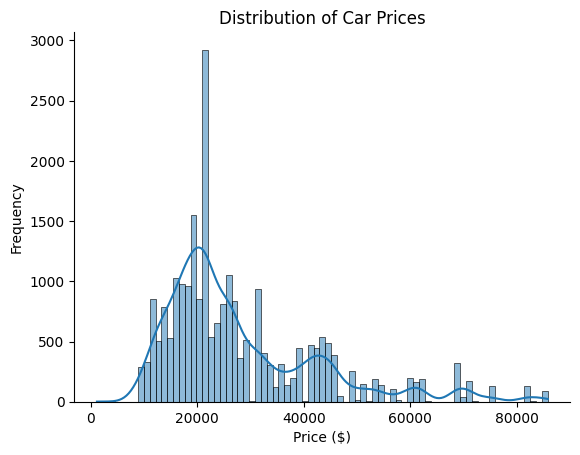

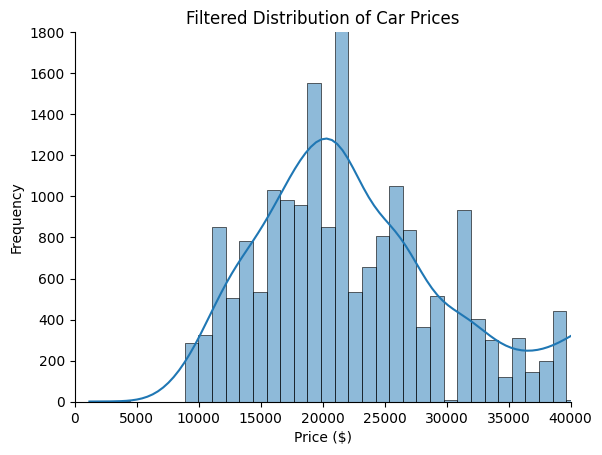

,Price
0,22000


In [361]:
#Histogram of Car Prices
sns.histplot(data=data, x='Price', kde=True)

plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

sns.despine()
plt.show()

#Filtered range of higher frequency car prices
sns.histplot(data=data, x='Price', kde=True)

plt.title('Filtered Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 40000)
plt.ylim(0, 1800)

sns.despine()
plt.show()

data['Price'].mode()

**Graph Explanation**

About 50% of the number of frequencies is largely located on the left side of the graph. The most amount of frequencies for a car price in this dataset is $22,000 just shy of 1,800 frequencies.

Cars that were sold the most had a price tag of $22,000. This can give insights to the marketing team and companies to gain an understanding of how consumers are budgeting and what could be a fair price.

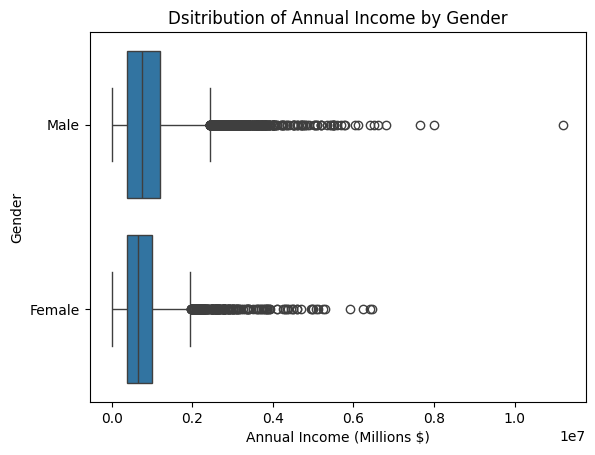

Ex. .2 = $2,000,000


In [362]:
#Box plot of Annual Income by Gender

sns.boxplot(data=data, x='Annual_income', y='Gender')
plt.title('Dsitribution of Annual Income by Gender')
plt.xlabel('Annual Income (Millions $)')
plt.show()

print("Ex. .2 = $2,000,000")

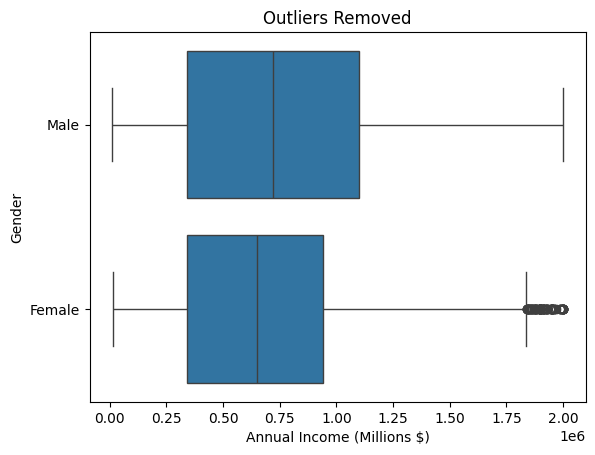

Ex. 1.00 = $1,000,000

Male Quartiles
0.25     340000.0
0.50     721000.0
0.75    1100000.0
Name: Annual_income, dtype: float64

Female Quartiles
0.25    340500.0
0.50    648500.0
0.75    940000.0
Name: Annual_income, dtype: float64


In [363]:
#Plot with removed outliers
data = data[data['Annual_income'] <= 2000000]

sns.boxplot(data=data, x='Annual_income', y='Gender')

plt.title('Outliers Removed')
plt.xlabel('Annual Income (Millions $)')
plt.show()

#Calculating quartiles for better readability
male_income = data[data['Gender'] == 'Male']['Annual_income']
m_quartiles = male_income.quantile([.25,.50,.75])

print("Ex. 1.00 = $1,000,000")
print()

print('Male Quartiles')
print(m_quartiles)

print()

female_income = data[data['Gender'] == 'Female']['Annual_income']
f_quartiles = female_income.quantile([.25,.50,.75])

print('Female Quartiles')
print(f_quartiles)

**Graph Explanation**

Males have a higher annual income than females, with outliers indicating that there are people who make significantly more than majority of the population of this dataset.

A cleaned up graph of this observation, with most outliers removed, gives us a better understanding of the majority of annual incomes by gender are located. Both males and females have roughly the same lower quartile of annual income which is $340,000. Both middle (50%) and top quartiles (75%) for male are higher than females.

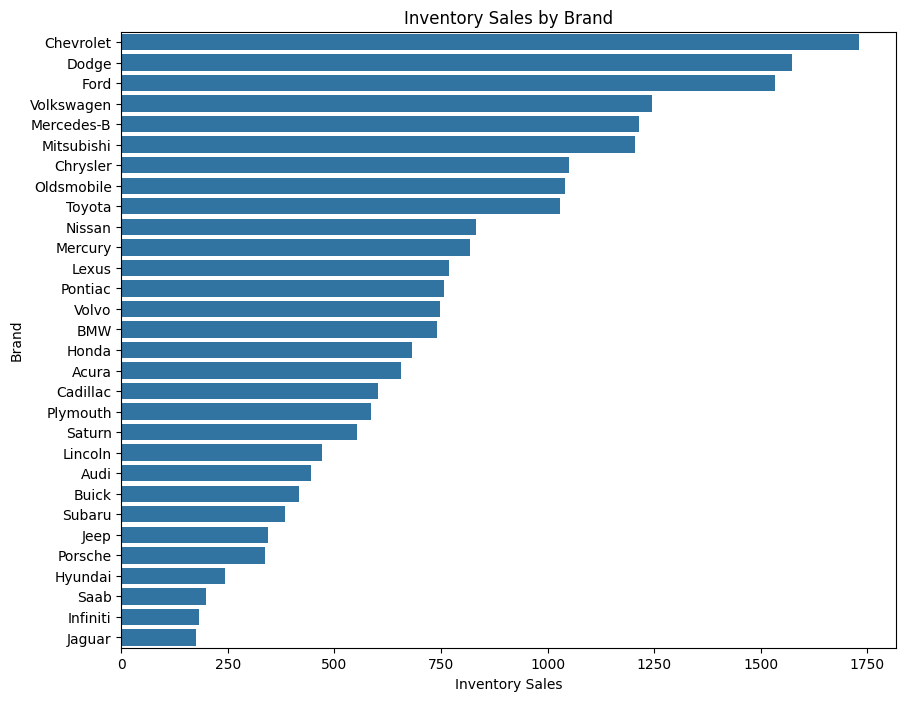

,Brand,Inventory_Sales
0,Chevrolet,1732
1,Dodge,1573
2,Ford,1533
3,Volkswagen,1246
4,Mercedes-B,1214


In [364]:
#Bar Chart of Car Inventory Sales by Brand
sales_by_brand = data['Brand'].value_counts().reset_index()
sales_by_brand.columns = ['Brand', 'Inventory_Sales']

plt.figure(figsize=(10, 8))
sns.barplot(data=sales_by_brand, x='Inventory_Sales', y='Brand')

plt.title('Inventory Sales by Brand')
plt.xlabel('Inventory Sales')
plt.ylabel('Brand')
plt.show()

#Top 5 Brand based on Chart
sales_by_brand.head(5)

**Graph Explanation**

Chevrolet has sold the most vehicles out of all brands, with 1,732 units. Both Dodge and Ford are close in sales with 1,573 and 1,533. Consumers prefer Chevrolet than any other brand, indicating preference upon looking for a vehicle.

Companies and marketing teams can effectively use this data to hopefully increase their sales by improving vehicle appeal and reputation.


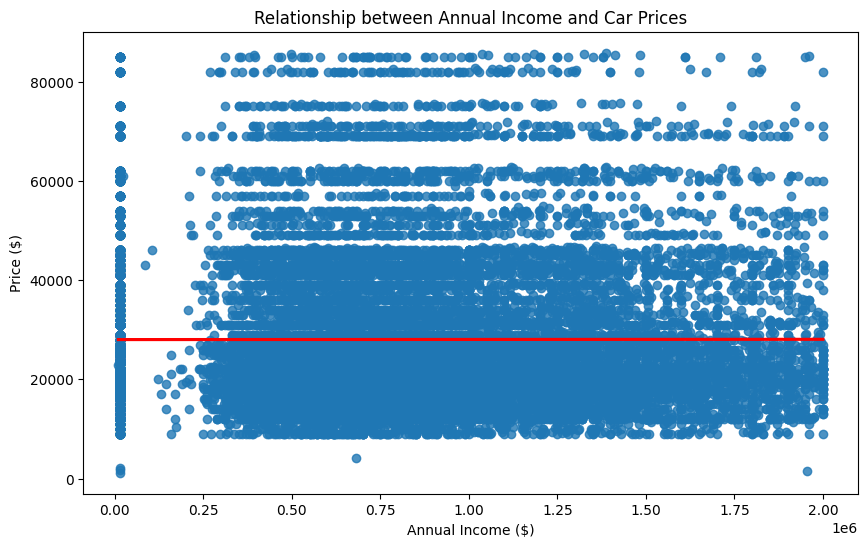

<Figure size 640x480 with 0 Axes>

In [365]:
#Scatter plot of Annual Income and Car Prices
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Annual_income', y='Price', scatter=True, ci=False, line_kws=({'color':'red'}))


plt.title('Relationship between Annual Income and Car Prices')
plt.ylabel('Price ($)')
plt.xlabel('Annual Income ($)')
plt.show()

sns.despine()

**Graph Explanation**

There is no relationship between an individual's annual income and the market price of a car, indicating independcy of these variables.

A person's income does not indicate whether they purchase an expensive or economical vehicle.

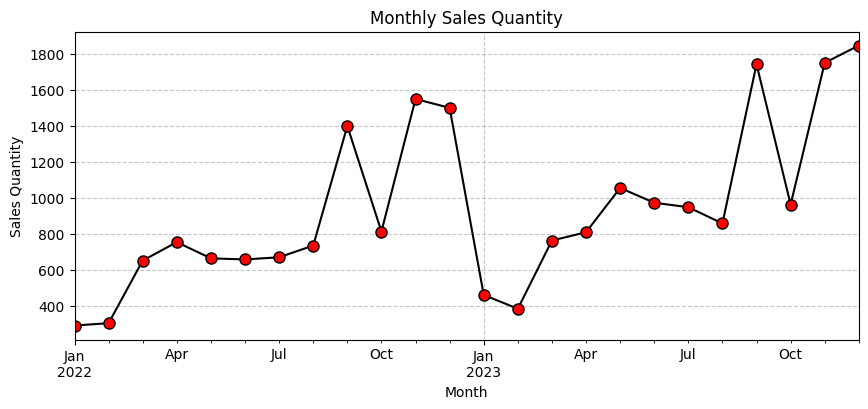

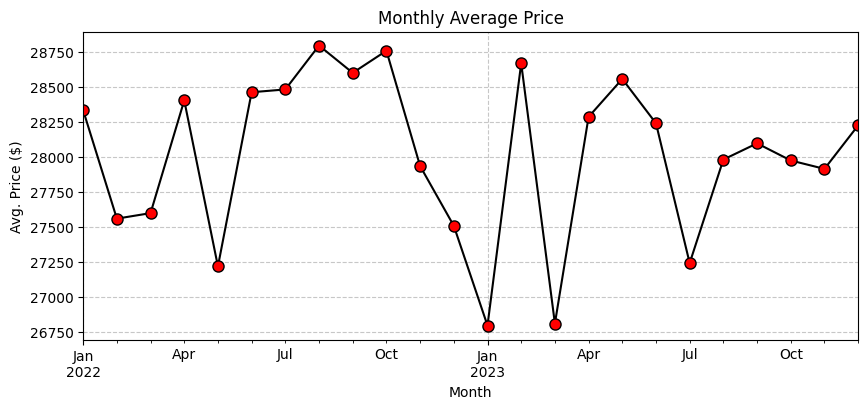

In [366]:
#Line Plot of Monthly Sales
plt.figure(figsize=(10.12,4))

monthly_sales = data['Quantity'].resample('ME').sum()
monthly_sales.plot(marker='o', linestyle='-',color='black',markerfacecolor='red',markersize=8)

plt.title('Monthly Sales Quantity')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.grid(True, linestyle='--',alpha=0.7)

#Line plot for Average Monthly Price
plt.figure(figsize=(10,4))

monthly_avg_price = data['Price'].resample('ME').mean()
monthly_avg_price.plot(marker='o', linestyle='-',color='black',markerfacecolor='red',markersize=8)

plt.title('Monthly Average Price')
plt.xlabel('Month')
plt.ylabel('Avg. Price ($)')

plt.grid(True, linestyle='--',alpha=0.7)

plt.show()


**Graph Explanation**

Sales fluctuate throughout the 2022 and 2023 years. There are spikes in sales in September 2022 with 1,400 units, November 2022 with roughly 1,550 units,again in September 2023 with 1,743 units, and again in November 2023 with 1,751 units. These peaks are indicate a substantial increase during these time periods.

The average price for a car fluctuates as well. Starting from October 2022 through January 2023, the average price starts to decrease. Suggesting that companies are trying to sell their current or past line of products to make room for upcoming ones.

Observing both graphs, we can see seasonal influences in sales and price adjustments depending on the market demand.

## 7. Findings & Conclusion

**Key insights from Dataset**

Working with this dataset, I was able to answer the questions stated in the beginning. The first one being, "Is there a significance on a person's annual income and the price of the car?". The answer was no. There is no relationship between the two variables. A person can have a high or low income and buy either an expensive or economical vehicle. There were also annual incomes that were extreme than the majority of the population.

The second question, "Does the season of the year affect inventory sales?". The answer was yes. Observing the graphs, I was able to infer that during the start of Fall seasons, inventory sales begin to increase. With the start of Winter seasons, inventory sales begin to decrease. Then during the Spring seasons inventory increases and remains relatively steady throught the summer.





**What was learned?**

I learned a lot through various observations from the data. Such as calculating which car brand sold the most vehicles, which was Chrevolet. The type of body (Sedan, SUV, etc.) that was sold the most, which was SUV.  

I was also able to calculate which body was popular among each car brand. There would be no values for certain rows, suggesting the brand does not make the specific body.


These insights are very useful for each company to inform them which models are popular among consumers and strategically planning for upcoming seasons.

Working through this dataset, I was able to utilize tools that was learned throughout this semester. Realizing how powerful each tool is used for data preperation and analyzation.

## 8. References

Dataset Source Link:

https://www.kaggle.com/datasets/missionjee/car-sales-report


In [335]:
!jupyter nbconvert --to html /content/Final_Project_Dylan_Gonzalez.ipynb

[NbConvertApp] WARNING | pattern '/content/Final_Project_Dylan_Gonzalez.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answ